In [136]:
import pandas as pd
import numpy as np

In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 

In [24]:
df = X.merge(y, left_index=True, right_index=True)

In [8]:
print(wine_quality.variables)

                    name     role        type demographic  \
0          fixed_acidity  Feature  Continuous        None   
1       volatile_acidity  Feature  Continuous        None   
2            citric_acid  Feature  Continuous        None   
3         residual_sugar  Feature  Continuous        None   
4              chlorides  Feature  Continuous        None   
5    free_sulfur_dioxide  Feature  Continuous        None   
6   total_sulfur_dioxide  Feature  Continuous        None   
7                density  Feature  Continuous        None   
8                     pH  Feature  Continuous        None   
9              sulphates  Feature  Continuous        None   
10               alcohol  Feature  Continuous        None   
11               quality   Target     Integer        None   

               description units missing_values  
0                     None  None             no  
1                     None  None             no  
2                     None  None             no  
3     

In [26]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [10]:
import seaborn as sns

<Axes: xlabel='fixed_acidity', ylabel='Count'>

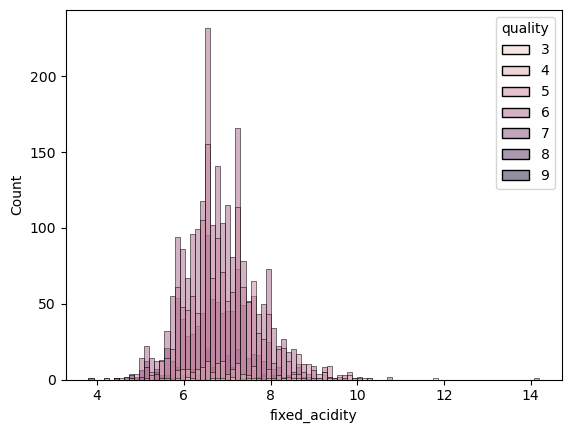

In [37]:
sns.histplot(df, x="fixed_acidity", hue="quality")

<Axes: xlabel='fixed_acidity', ylabel='Count'>

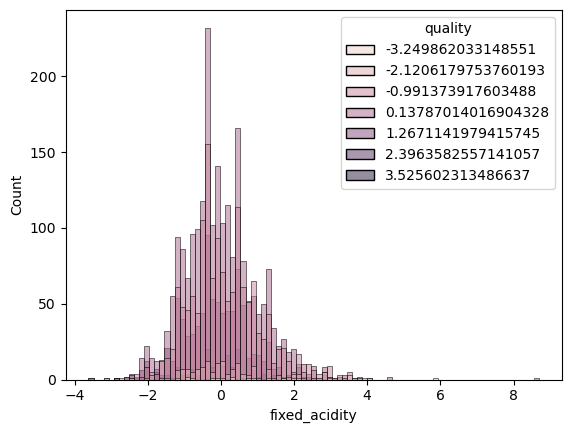

In [43]:
# import standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
sns.histplot(scaled_df, x="fixed_acidity", hue="quality")

In [40]:
scaled_df

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -3.49184257e-01, -1.39315246e+00,  1.37870140e-01],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         1.34184656e-03, -8.24275678e-01,  1.37870140e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
        -4.36815783e-01, -3.36667007e-01,  1.37870140e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -2.61552731e-01, -9.05543789e-01,  1.37870140e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
        -9.62604939e-01,  1.85757201e+00,  1.26711420e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
        -1.48839409e+00,  1.04489089e+00,  1.37870140e-01]])

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = scaled_df.drop(columns=["quality"])
y = scaled_df["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.2652750042119655

<Axes: ylabel='Count'>

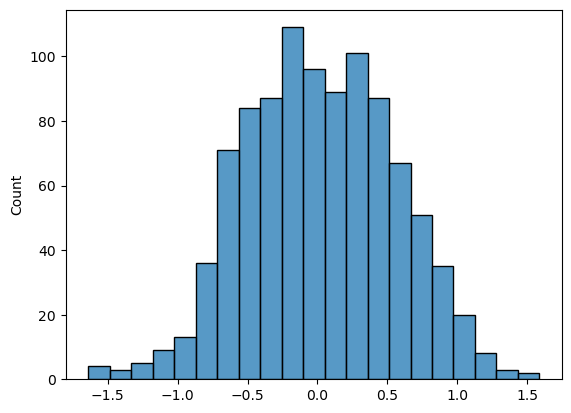

In [52]:
sns.histplot(model.predict(X_test))

<Axes: xlabel='quality', ylabel='Count'>

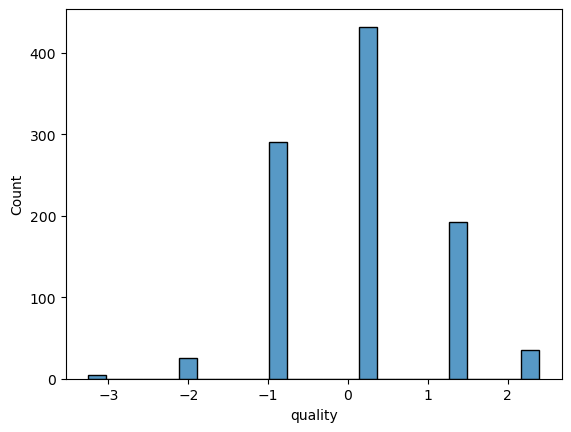

In [53]:
sns.histplot(y_test)

<Axes: xlabel='quality', ylabel='Count'>

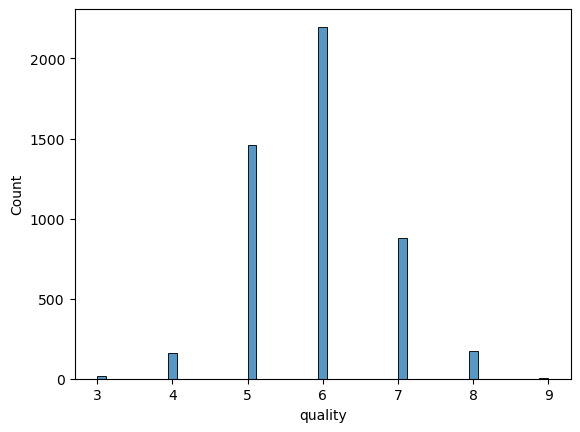

In [55]:
sns.histplot(df['quality'])

In [56]:
from sklearn.linear_model import RidgeCV

model = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.26517211151381426

In [57]:
from sklearn.linear_model import LassoCV

model = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1])
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.26436190615571664

In [65]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.3023159180823699

In [67]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(max_depth=4, n_estimators=100, n_jobs=-1)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.32149387430042853

In [80]:
model = RandomForestRegressor(max_depth=20, n_estimators=20, n_jobs=-1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5268559981390557

<Axes: >

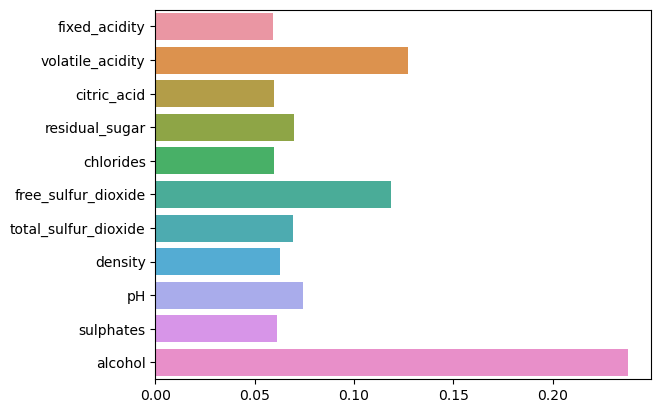

In [82]:
# plot feature importance with sns
sns.barplot(x=model.feature_importances_, y=X.columns)

In [84]:
X_top3_train = X_train[["alcohol", "volatile_acidity", "free_sulfur_dioxide"]]
X_top3_test = X_test[["alcohol", "volatile_acidity", "free_sulfur_dioxide"]]


In [97]:
model = RandomForestRegressor(max_depth=15, n_estimators=30, n_jobs=-1)
model.fit(X_top3_train, y_train)

model.score(X_top3_test, y_test)

0.4064089401628832

In [101]:
df['quality'].value_counts(normalize=True)

quality
6    0.448755
5    0.297468
7    0.179665
8    0.035729
4    0.033279
3    0.004083
9    0.001021
Name: proportion, dtype: float64

In [102]:
y = df['quality']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=15, n_estimators=30, n_jobs=-1, class_weight="balanced")
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6418367346938776

In [116]:
model = RandomForestClassifier(max_depth=40, n_estimators=40, n_jobs=-1, class_weight="balanced")
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6948979591836735

In [117]:
model = RandomForestClassifier(max_depth=40, n_estimators=40, n_jobs=-1, class_weight="balanced_subsample")
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6806122448979591

In [135]:
model = RandomForestClassifier(n_estimators=20, n_jobs=-1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6857142857142857

In [139]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': np.arange(10, 100, 10)}
model = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, n_jobs=-1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6959183673469388

In [140]:
model.best_params_

{'n_estimators': 60}

In [142]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, n_jobs=-1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5316326530612245

In [144]:
import xgboost as xgb

In [148]:
y = y.apply(lambda x: x-3)

In [153]:
model = xgb.XGBClassifier(n_estimators=100, max_depth=5, n_jobs=-1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6561224489795918

In [156]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.60      0.36      0.45        25
           2       0.71      0.66      0.69       291
           3       0.66      0.76      0.70       432
           4       0.68      0.61      0.64       192
           5       0.68      0.49      0.57        35

    accuracy                           0.68       980
   macro avg       0.56      0.48      0.51       980
weighted avg       0.67      0.68      0.67       980



In [157]:
model = RandomForestClassifier(n_estimators=20, n_jobs=-1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6836734693877551

In [158]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.75      0.24      0.36        25
           2       0.68      0.71      0.69       291
           3       0.66      0.76      0.71       432
           4       0.74      0.59      0.66       192
           5       0.80      0.46      0.58        35

    accuracy                           0.68       980
   macro avg       0.61      0.46      0.50       980
weighted avg       0.69      0.68      0.68       980



/Users/gregorysamek/anaconda3/envs/bt-nn/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gregorysamek/anaconda3/envs/bt-nn/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gregorysamek/anaconda3/envs/bt-nn/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [159]:
model = RandomForestClassifier(n_estimators=20, n_jobs=-1, class_weight="balanced")
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.686734693877551

In [160]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.47      0.28      0.35        25
           2       0.70      0.67      0.69       291
           3       0.67      0.79      0.72       432
           4       0.73      0.60      0.66       192
           5       0.88      0.43      0.58        35

    accuracy                           0.69       980
   macro avg       0.57      0.46      0.50       980
weighted avg       0.69      0.69      0.68       980



In [161]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5489795918367347

In [162]:
model = GridSearchCV(KNeighborsClassifier(), param_grid={"n_neighbors": np.arange(1, 10)}, n_jobs=-1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6459183673469387

In [163]:
model.best_params_

{'n_neighbors': 1}

In [170]:
model = LogisticRegression(max_iter=1000, n_jobs=-1, multi_class="multinomial")
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5316326530612245

In [174]:
model.predict_proba(X_test)

array([[3.05852717e-04, 1.72498425e-03, 1.01973887e-01, ...,
        2.56113428e-01, 8.88082684e-02, 2.04242477e-05],
       [9.76089404e-04, 1.34014211e-02, 7.63061714e-02, ...,
        3.63337006e-01, 1.29538057e-01, 5.17661087e-04],
       [2.99235535e-03, 7.91576813e-03, 6.09940103e-02, ...,
        3.69422440e-01, 7.64684655e-02, 6.10149273e-03],
       ...,
       [3.13426882e-04, 1.19819775e-02, 3.88255391e-01, ...,
        8.85493395e-02, 1.25681203e-02, 2.51463171e-05],
       [9.77991753e-04, 5.88943545e-02, 5.67327816e-01, ...,
        3.17783786e-02, 3.26798912e-03, 4.70362491e-06],
       [4.11418008e-03, 4.61090951e-02, 3.66040750e-01, ...,
        1.04943356e-01, 1.11529694e-02, 6.92209986e-04]])

In [175]:
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV(max_iter=1000, n_jobs=-1, multi_class="multinomial", penalty="l2", Cs=10)

In [176]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5295918367346939

In [180]:
model = LogisticRegression(max_iter=1000, n_jobs=-1, multi_class="multinomial", class_weight="balanced")
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.30714285714285716

In [182]:
model = LogisticRegressionCV(max_iter=10000, n_jobs=-1, multi_class="multinomial", penalty="l2", Cs=10, class_weight="balanced")
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3153061224489796

<Axes: xlabel='quality', ylabel='Count'>

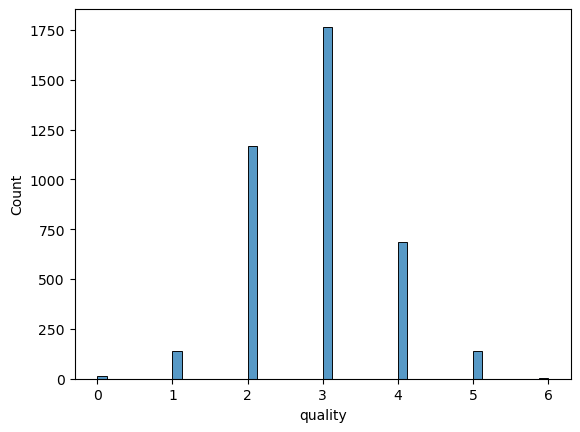

In [183]:
sns.histplot(y_train)

<Axes: xlabel='quality', ylabel='Count'>

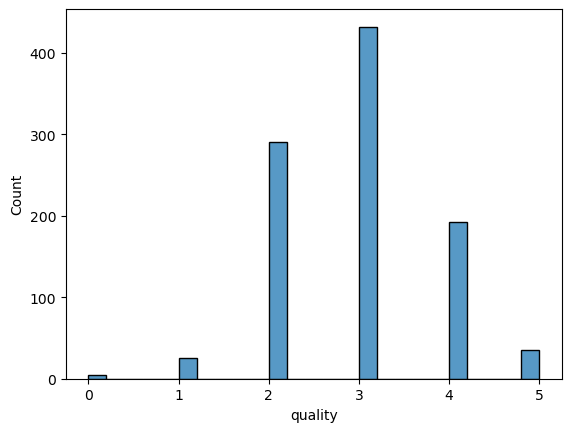

In [184]:
sns.histplot(y_test)

/Users/gregorysamek/anaconda3/envs/bt-nn/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: ylabel='Count'>

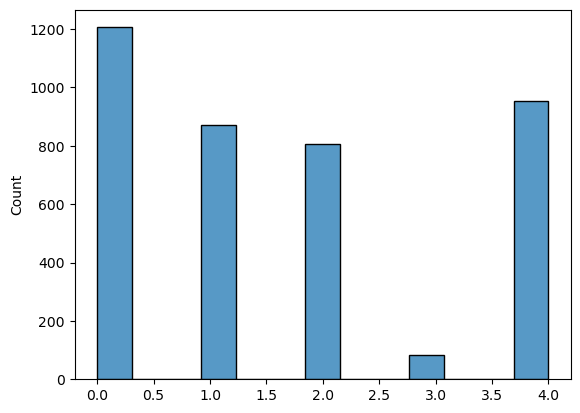

In [185]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)
model.fit(X_train)
sns.histplot(model.labels_)

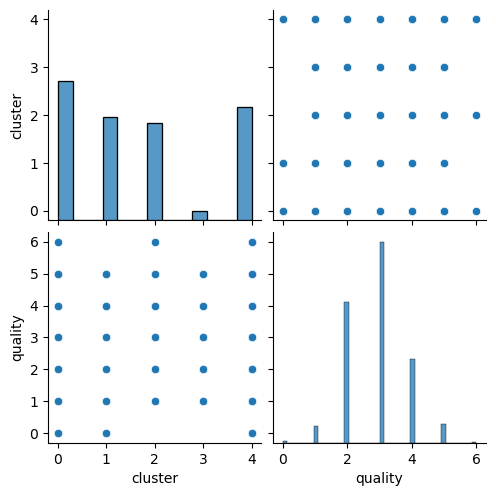

In [186]:
X_clustered = X_train.merge(pd.DataFrame(model.labels_, columns=["cluster"]), left_index=True, right_index=True)
X_clustered = X_clustered.merge(y_train, left_index=True, right_index=True)

sns.pairplot(X_clustered[['cluster', 'quality']])

In [193]:
X_clustered.corr()['cluster']

fixed_acidity           0.010281
volatile_acidity       -0.013591
citric_acid             0.000192
residual_sugar          0.032885
chlorides               0.008959
free_sulfur_dioxide     0.022291
total_sulfur_dioxide    0.013053
density                 0.017803
pH                     -0.033151
sulphates              -0.011116
alcohol                -0.009881
cluster                 1.000000
quality                 0.007958
Name: cluster, dtype: float64